## Generating random connectomes and compare DICE

use `rajutils` functions to generate random connectomes:

In [1]:
%%capture --no-display

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from scipy.spatial import distance

# spectrome imports
from spectrome.brain import Brain
from spectrome.utils import functions, path
from spectrome.forward import eigenmode, get_complex_laplacian

from rajutils.utils import generate

get some reference edge and vertice numbers from HCP template:

In [2]:
hcp_dir = '../../data'

HCP_brain = Brain.Brain()
HCP_brain.add_connectome(hcp_dir)
HCP_brain.reorder_connectome(HCP_brain.connectome, HCP_brain.distance_matrix)
HCP_brain.bi_symmetric_c()
HCP_brain.reduce_extreme_dir()

In [3]:
print("Number of vertices: ", HCP_brain.connectome.shape[0])
print("Number of edges: ", np.count_nonzero(np.triu(HCP_brain.reducedConnectome)))
print("HCP weight mean: ", np.mean(np.mean(HCP_brain.reducedConnectome)))
print("HCP weight std: ", np.std(HCP_brain.reducedConnectome))

Number of vertices:  86
Number of edges:  3418
HCP weight mean:  18.08254396427022
HCP weight std:  44.19650857621448


generate completely random connectome first:

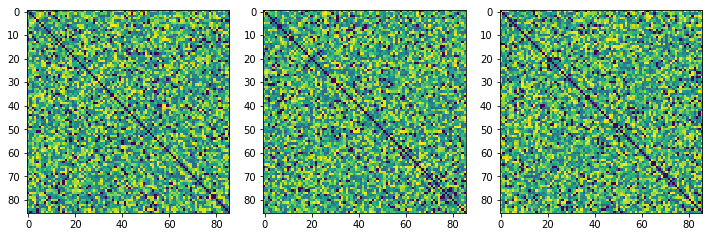

In [4]:
# start by generating only 3 connectomes first:
n = 3
v = 86
e = 3400
m = 18
s = 44

p = 1
plt.figure('Random Connectomes', figsize = (10,5))
for k in np.arange(0,n):
    C = generate.random_Cij_und(v,e)
    C = generate.add_weights(C,m,s)
    plt.subplot(1,n,p)
    plt.imshow(C)
    p += 1
    
plt.tight_layout()

generate distance controlled connectomes:

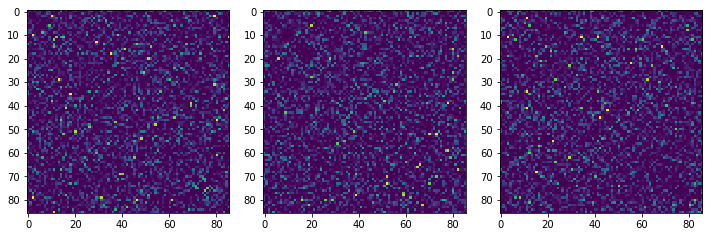

In [5]:
p = 1
plt.figure('Distance Connectomes', figsize = (10,5))
for k in np.arange(0,n):
    C = generate.exp_neg_dist_Cij(HCP_brain.distance_matrix)
    plt.subplot(1,n,p)
    plt.imshow(C)
    p += 1
    
plt.tight_layout()

function for comparing DICE:

In [ ]:
def compute_dice(C, D, frequency, alpha, speed):
    """
    Take in connectome and generate dice scores based on parameters
    """
    w = 2*np.pi*frequency # omega, angular frequency
    com_laplacian = get_complex_laplacian(C,D,w,alpha,speed)
    dice_scores = eigenmode.get_dice_df()